<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/3Qubit_Quantum_RandomNumberGenerator_mkbahk_20241105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]==1.2.4
!python3 -m pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 687.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 2.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b7f8132bb38a7244554ef1c1dc9437e3623d1f4a0c689233e7b18f583c95224d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.6 MB/s eta 0:00:00


3Qubit으로 양자 난수 발생

In [5]:
# Qiskit 모듈 불러오기
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.providers.jobstatus import JobStatus
import time

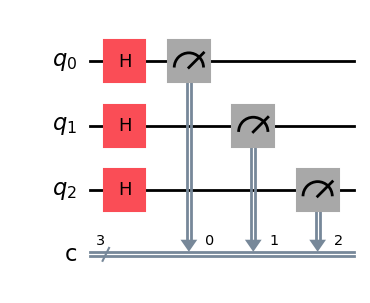

In [6]:
# 3 큐비트 양자 회로 생성
qc = QuantumCircuit(3, 3)

# 큐비트 0, 1 및 2를 슈미트 (Hadamard) 게이트로 초기화
qc.h(qubit=0)
qc.h(qubit=1)
qc.h(qubit=2)

# 결과 측정, 저장
qc.measure([0,1,2], [0,1,2])

# 양자회로 구조 보기
qc.draw('mpl')

In [10]:
backend = Aer.get_backend('qasm_simulator')  #Local Qiskit Aer 시뮬레이터 사용

In [14]:
job = backend.run(qc, shots=1024)

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while

# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

# 결과 출력
result = job.result()
counts = result.get_counts()
print(counts)

Job status is JobStatus.INITIALIZING
Job status is JobStatus.DONE
{'101': 115, '000': 148, '010': 119, '110': 125, '100': 135, '001': 131, '011': 131, '111': 120}


각 확률을 1024샷에 3Qubit 으로 나누고,<BR>
각각의 확률값을 2진 비트로 전환

In [15]:
bits = " "
for v in counts.values():
    if v > 1024/(2**3):  #1024 shot를 8로 나누기, 기준값 128을 얻음
        bits += '1'
    else:
        bits += '0'
    ###if
###
print(bits)

 01001110


In [16]:
#매번 전체를 수행할 때마다 결과가 다르게 나와야 합니다.
decimal_string = str(int(bits, 2))
print(decimal_string)

78
